In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV,KFold 
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")

### 1. Read the dataset and view the first 10 rows of it.

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### 2. Check the shape/dimension of the dataset

In [6]:
df.shape

(5110, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 3. Check for the missing values.Display number of missing values per column.

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 4. Investigate and predict the missing BMI Value.

In [24]:
def age(age):
    if age<=5:
        return "Toddler"
    if (age>=6) & (age<=12):
        return "Child"
    if (age>=13) & (age<=19):
        return "Teenager"
    if (age>=20) & (age<=34):
        return "Adult"
    if (age>=35) & (age<=59):
        return "Middle Age"
    if age>=60:
        return "Teenager"

In [25]:
df["age Cat"] = df["age"].apply(lambda x: age(x))

In [27]:
df["bmi"] = df.groupby("age Cat")["bmi"].apply(lambda x: x.fillna(x.median()))

In [28]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age Cat              0
dtype: int64

In [30]:
df.drop("age Cat",axis=1,inplace=True)

### 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   int64  
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(9)
memory usage: 459.2 KB


### 6. Check the descriptive statistics of the dataset.

In [32]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,105.658317,28.864609,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.275290,7.719613,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.000000,23.700000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.000000,28.300000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.000000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.000000,97.600000,3.000000,1.000000


### 7. Visualize the proportion of Stroke samples in the dataset.

In [34]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

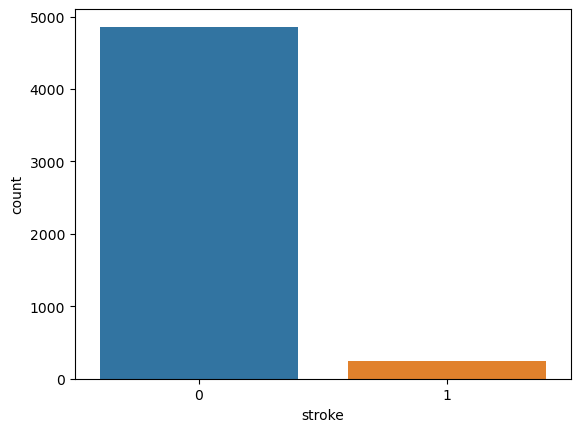

In [35]:
sns.countplot(x=df["stroke"])
plt.show()

In [ ]:
8

### 10.Visualize the stroke sample based on

#### a) BMI and Glucose Level

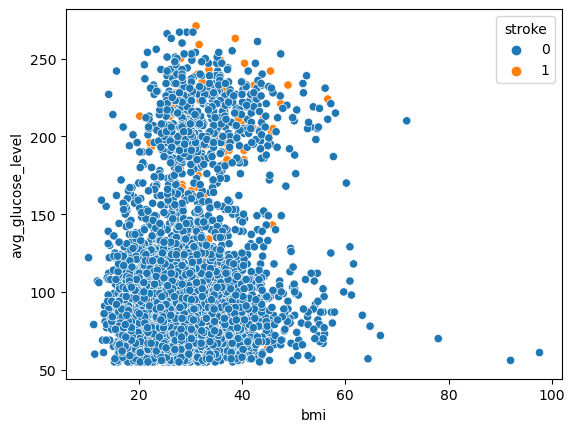

In [36]:
sns.scatterplot(x=df["bmi"],y=df["avg_glucose_level"],hue=df["stroke"])
plt.show()

#### b) BMI and Age

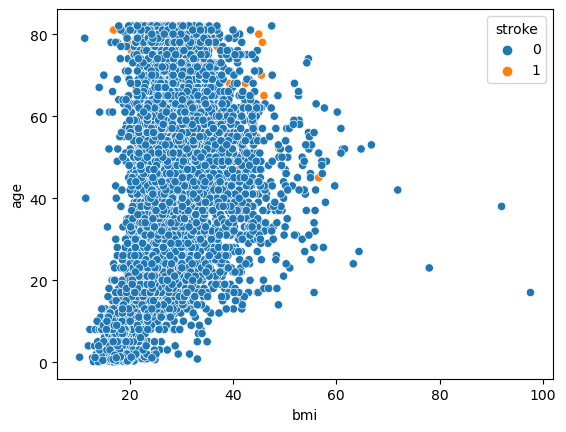

In [37]:
sns.scatterplot(x=df["bmi"],y=df["age"],hue=df["stroke"])
plt.show()

### 9. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

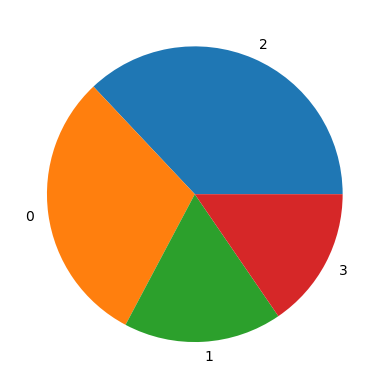

In [39]:
pd.crosstab(df.gender,df.smoking_status)

In [6]:
pd.crosstab(df.gender,df.smoking_status)

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836,477,1229,452
Male,708,407,663,337
Other,0,1,0,0


<Axes: xlabel='smoking_status', ylabel='count'>

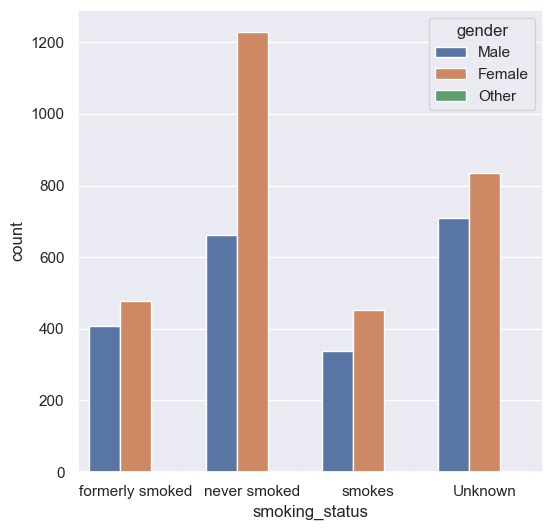

In [8]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data=df,x=df.smoking_status,hue=df.gender)

### 10. Perform hypothesis testing to find the significant variables.

H0: The numerical variables are normally distributed

H1: The numerical variables are not normally distributed

In [40]:
zero = df[df["stroke"]==0].drop("stroke",axis=1)
one = df[df["stroke"]==1].drop("stroke",axis=1)
for i in df.select_dtypes(include="number").drop("stroke",axis=1).columns:
    print("Zero",i,stats.shapiro(zero[i]))
    print("One",i,stats.shapiro(one[i]))

Zero id ShapiroResult(statistic=0.9536995887756348, pvalue=1.0379210108873446e-36)
One id ShapiroResult(statistic=0.9446319341659546, pvalue=4.21573957964938e-08)
Zero gender ShapiroResult(statistic=0.6269482374191284, pvalue=0.0)
One gender ShapiroResult(statistic=0.6300439834594727, pvalue=7.144901283026509e-23)
Zero age ShapiroResult(statistic=0.9704752564430237, pvalue=1.6263547388824356e-30)
One age ShapiroResult(statistic=0.8781338334083557, pvalue=3.1740154124784703e-13)
Zero hypertension ShapiroResult(statistic=0.3195730447769165, pvalue=0.0)
One hypertension ShapiroResult(statistic=0.5506410598754883, pvalue=7.413848400582891e-25)
Zero heart_disease ShapiroResult(statistic=0.21538954973220825, pvalue=0.0)
One heart_disease ShapiroResult(statistic=0.4767826199531555, pvalue=1.802671352392826e-26)
Zero ever_married ShapiroResult(statistic=0.6055669784545898, pvalue=0.0)
One ever_married ShapiroResult(statistic=0.3725637197494507, pvalue=1.8136692934882267e-28)
Zero work_type Sha

* All numerical variables are not normally distributed

H0: The variance amoung groups are equal

H1: The variance amoung not groups are equal

In [41]:
for i in df.select_dtypes(include="number").drop("stroke",axis=1).columns:
    print(i,stats.levene(zero[i],one[i]))

id LeveneResult(statistic=0.6552173694838374, pvalue=0.41829119012862936)
gender LeveneResult(statistic=0.40726599770172073, pvalue=0.5233890572370924)
age LeveneResult(statistic=129.73660960413392, pvalue=1.0651819334659263e-29)
hypertension LeveneResult(statistic=84.95354215995654, pvalue=4.3675567699797555e-20)
heart_disease LeveneResult(statistic=94.69840601636669, pvalue=3.4519273717538474e-22)
ever_married LeveneResult(statistic=60.66722965592068, pvalue=8.128658950932845e-15)
work_type LeveneResult(statistic=7.805923436283518, pvalue=0.005226932131164463)
Residence_type LeveneResult(statistic=1.2208416612473314, pvalue=0.26924758060834464)
avg_glucose_level LeveneResult(statistic=94.22186558911832, pvalue=4.372358653192887e-22)
bmi LeveneResult(statistic=24.12198545710415, pvalue=9.324180029834948e-07)
smoking_status LeveneResult(statistic=4.289778263591791, pvalue=0.03839226443775993)


* The variance amoung not groups are equal

H0: Independent and target variable are Independent of each other

H1: Independent and target variable are dependent

In [42]:
for i in df.select_dtypes(include="number").drop("stroke",axis=1).columns:
    print(i,stats.mannwhitneyu(zero[i],one[i]))

id MannwhitneyuResult(statistic=594647.0, pvalue=0.6422754428825589)
gender MannwhitneyuResult(statistic=592750.5, pvalue=0.5206531187357445)
age MannwhitneyuResult(statistic=200263.5, pvalue=3.726634665900011e-71)
hypertension MannwhitneyuResult(statistic=498565.5, pvalue=6.120973948168256e-20)
heart_disease MannwhitneyuResult(statistic=519471.5, pvalue=5.2510318536289465e-22)
ever_married MannwhitneyuResult(statistic=460543.0, pvalue=9.648714736331621e-15)
work_type MannwhitneyuResult(statistic=641055.0, pvalue=0.07813004105675775)
Residence_type MannwhitneyuResult(statistic=583471.5, pvalue=0.26921690843464474)
avg_glucose_level MannwhitneyuResult(statistic=471321.0, pvalue=3.7108374638387097e-09)
bmi MannwhitneyuResult(statistic=518351.0, pvalue=0.00013082998903743572)
smoking_status MannwhitneyuResult(statistic=564249.5, pvalue=0.05909284554614667)


* Except id all the other numerical columns are dependent variable

H0: The two groups have no significant difference

H1: The two groups have significant difference

In [43]:
cat = df.select_dtypes(include="O").columns
for i in cat:
    tbl=pd.crosstab(df[i],df["stroke"])
    teststat,pvalue,dof,exp= stats.chi2_contingency(tbl)
    print("Pvalue for",i,"is",pvalue)

* Except gender and residence_type all the other catogerical columns significant difference

### 11. Drop the unnecessary columns.

* We can drop id,gender and residence_type columns

In [27]:
df.drop(["id","gender","Residence_type"],axis=1,inplace=True)

In [24]:
df.shape

(5110, 9)

### 12. Write the code to replace following categories columns in integer format as follow –

#### a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)

In [44]:
df["work_type"].replace({"Private":0,"Self-employed":1,"Govt_job":2,"children":-1,"Never_worked":-2},inplace=True)

#### b) ever_married('Yes': 1, 'No': 0)

In [45]:
df["ever_married"].replace({"Yes":1,"No":0},inplace=True)

#### c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [46]:
df["smoking_status"].replace({"never smoked":0,"Unknown":1,"formerly smoked":2,"smokes":-1},inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   int64  
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(9)
memory usage: 459.2 KB


### 13. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

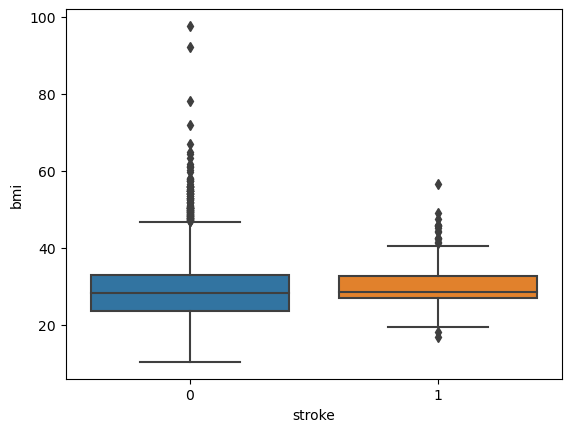

In [32]:
sns.boxplot(data=df,y="bmi",x="stroke")
plt.show()

### 14. List down columns that are highly skewed.

In [33]:
df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.585971
avg_glucose_level    1.572284
bmi                  1.072056
smoking_status       0.082279
stroke               4.193284
dtype: float64

* hypertension,heart_disease,stroke are highly skewed

### 15. List down the columns that are highly kurtosis.

In [34]:
df.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.059562
avg_glucose_level     1.680479
bmi                   3.574335
smoking_status       -0.922415
stroke               15.589736
dtype: float64

* heart_disease,heart_disease are highly kurtosis

### 16. Find the distribution of all variables with respect to the outcome 'stroke' variable.

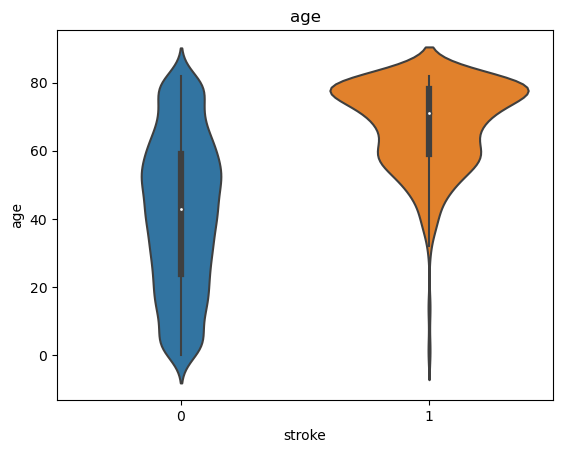

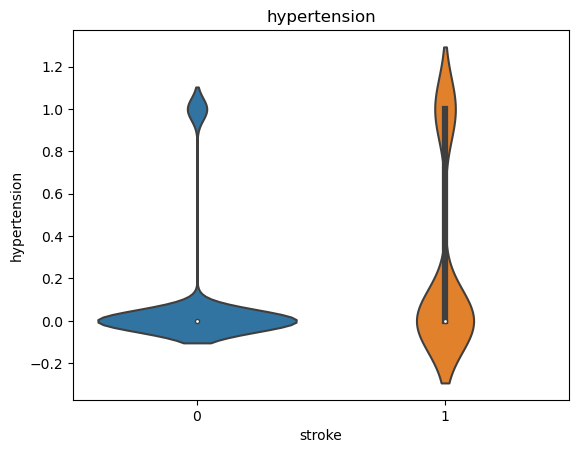

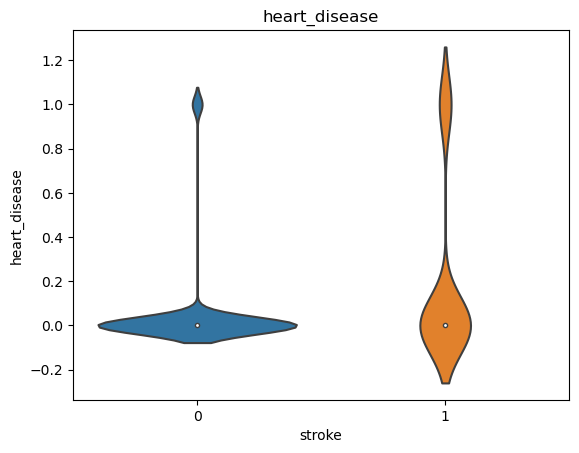

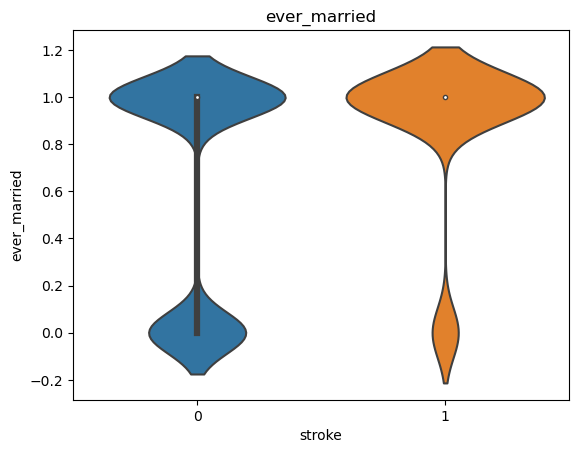

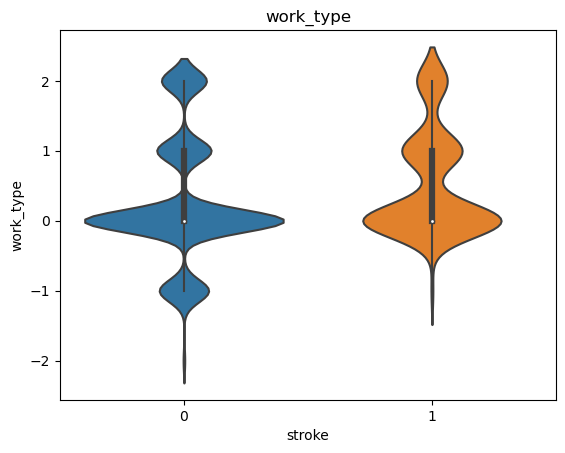

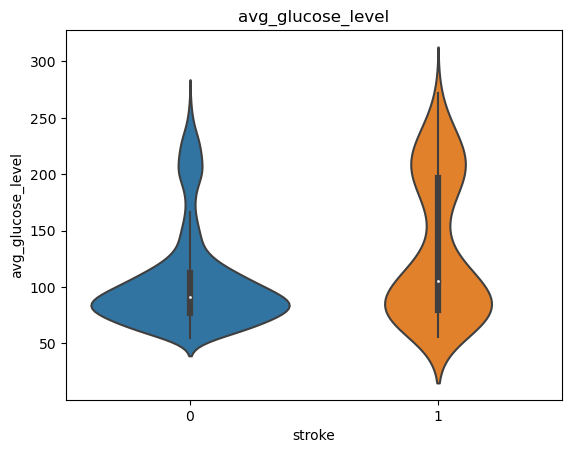

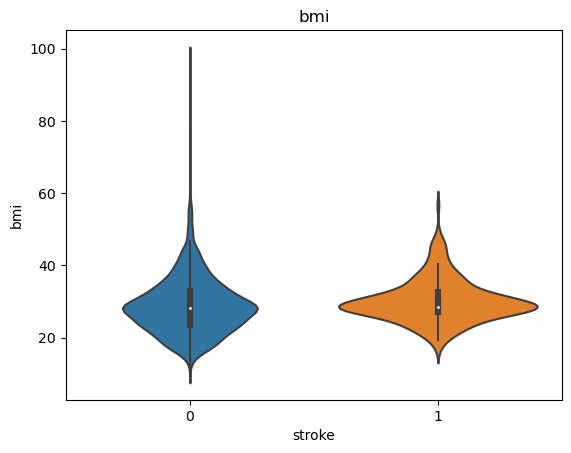

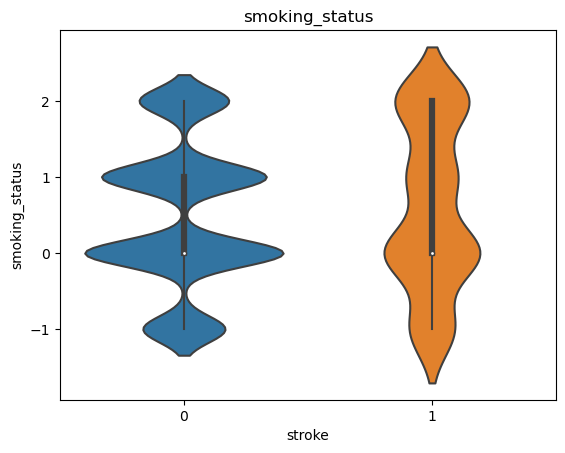

In [35]:
for i in df.drop("stroke",axis=1).columns:
    sns.violinplot(data=df,x="stroke",y=i)
    plt.title(i)
    plt.show()

### 17. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)

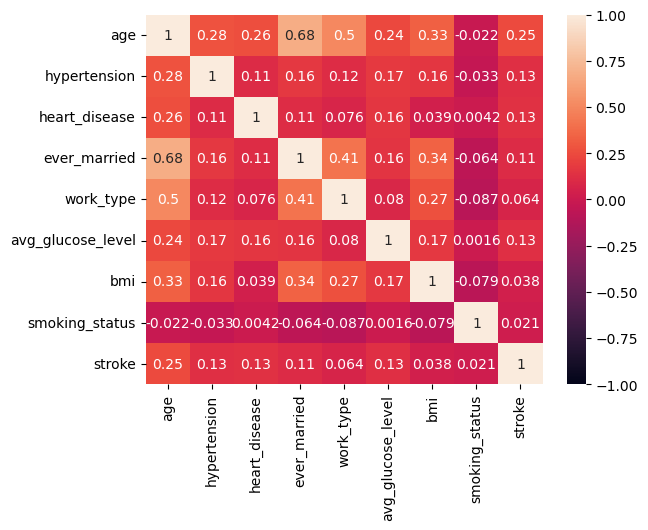

In [36]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

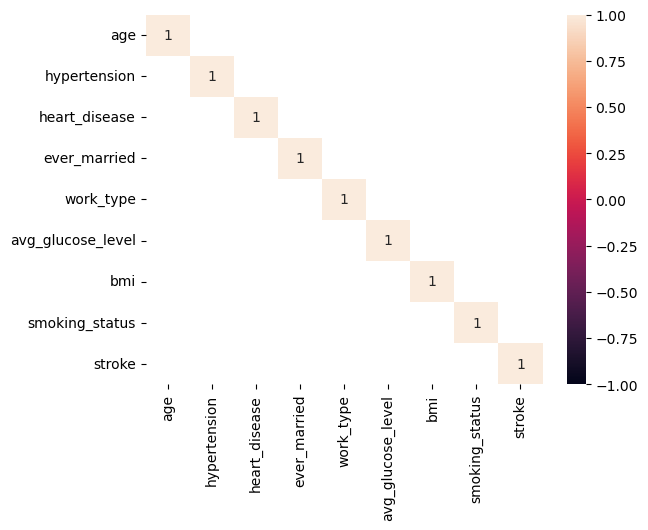

In [37]:
sns.heatmap(df.corr()[df.corr()>0.7],annot=True,vmin=-1,vmax=1)
plt.show()

### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [39]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.30)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((3577, 8), (1533, 8), (3577,), (1533,))

In [ ]:
x = df.drop("stroke",axis=1)
y = df["stroke"]

### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [40]:
ytrain.value_counts()

0    3408
1     169
Name: stroke, dtype: int64

In [41]:
smote = SMOTE(sampling_strategy=0.50,random_state = 10)
xtrain_sm1, ytrain_sm1 = smote.fit_resample(xtrain,ytrain)
ytrain_sm1.value_counts()

0    3408
1    1704
Name: stroke, dtype: int64

### 22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
### Model Evaluation
- Evaluate the models using appropriate evaluation metrics.

In [42]:
model_score = pd.DataFrame(columns=["Model","Accuracy","F1 Score","Precision","Recall"])

In [4]:
def score_calculator(model,ytest,ypred):
    global model_score
    acc = accuracy_score(ytest,ypred)
    f1 = f1_score(ytest,ypred,average="micro")
    pres = precision_score(ytest,ypred,average="micro")
    recall = recall_score(ytest,ypred,average="micro")
    model_score = model_score.append({"Model":model,"Accuracy":acc,"F1 Score":f1,"Precision":pres,"Recall":recall},ignore_index=True)
    return model_score

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le=LabelEncoder()

In [12]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,2,Urban,228,36.6,1,1
1,51676,Female,61.0,0,0,1,3,Rural,202,NaN,2,1
2,31112,Male,80.0,0,1,1,2,Rural,105,32.5,2,1
3,60182,Female,49.0,0,0,1,2,Urban,171,34.4,3,1
4,1665,Female,79.0,1,0,1,3,Rural,174,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,2,Urban,83,NaN,2,0
5106,44873,Female,81.0,0,0,1,3,Urban,125,40.0,2,0
5107,19723,Female,35.0,0,0,1,3,Rural,82,30.6,2,0
5108,37544,Male,51.0,0,0,1,2,Rural,166,25.6,1,0


In [61]:
df.avg_glucose_level=df['avg_glucose_level'].astype('int64')
df.bmi=df['bmi'].astype('int64')

In [49]:
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["work_type"]=le.fit_transform(df["work_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202,28.4,2,1
2,31112,1,80.0,0,1,1,2,0,105,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174,24.0,2,1


In [50]:
x=df.drop(columns='stroke')
y=df.stroke
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [51]:
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [58]:
y_pred = model_svm.predict(X_test)

In [59]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.9471624266144814


In [ ]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.9432485322896281
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.94      0.92      1533



In [ ]:
## 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

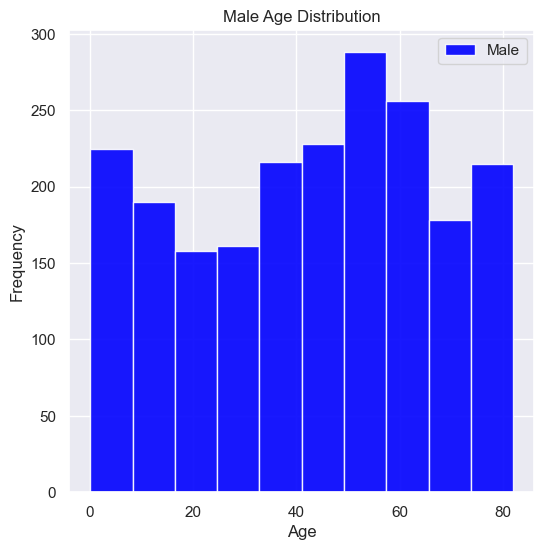

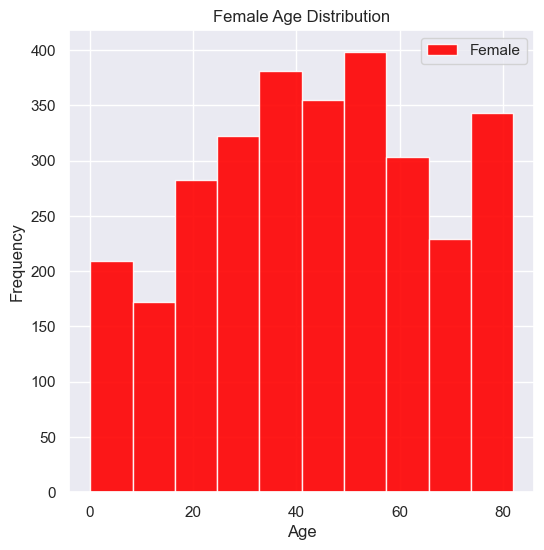

In [9]:
plt.figure()
plt.hist(df[df['gender'] == 'Male']['age'], bins=10, alpha=0.9, label='Male',color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Male Age Distribution')

plt.show()

plt.figure()
plt.hist(df[df['gender'] == 'Female']['age'], bins=10, alpha=0.9, label='Female',color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Female Age Distribution')

plt.show()
